<a href="https://colab.research.google.com/github/combechelsey/Prediction-of-Product-Sales-2/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Prediction of Product Sales**
#### Chelsey Combe
---


##Project Overview

Project 1 - Part 2 (Core):
We will continue to work off of the GitHub repository you created last week for your first portfolio project. The goal of your portfolio projects are to have items to show potential employers that demonstrate your data science skills and competencies.

The first project will be a sales prediction for food items sold at various stores. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.



For Part 2, your task is to use Pandas to load in the data and start exploring and cleaning it. As data scientists, about 80% of our time is spent on data preparation - so this is a very important step!

Download the data using this link: download the data. (Note: Original data source).
Insert code below the heading "Loading Data"
Use Pandas to read the sales prediction data set into Google Colab.
Use df.info() and df.head() methods to preview the first rows of your data and a summary of your DataFrame's columns.
Insert code below the heading "Data Cleaning"
Explore the data - what do you need to do to clean this data? Clean it!
Be sure to address each of the following tasks:
1) How many rows and columns?

2) What are the datatypes of each variable?

3) Are there duplicates? If so, drop any duplicates.

4) Identify missing values.

5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

6) Confirm that there are no missing values after addressing them.

7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).

8) For any numerical columns, obtain the summary statistics of each (min, max, mean).



Project 1 - Part 3 (Core):
We will continue to work on your sales prediction project. The goal of this is to help you understand the data as it relates to the products and outlets that play crucial roles in increasing sales.

For Part 3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. This must include at least one of each:

Histograms to view the distributions of numerical features in your dataset.
Boxplots to view statistical summaries of numerical features in your dataset.
Countplots to view the frequency of each class of categorial features in your dataset.
Heatmap to view the correlation between features.

Link to original dataset: https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/


##Data Dictionary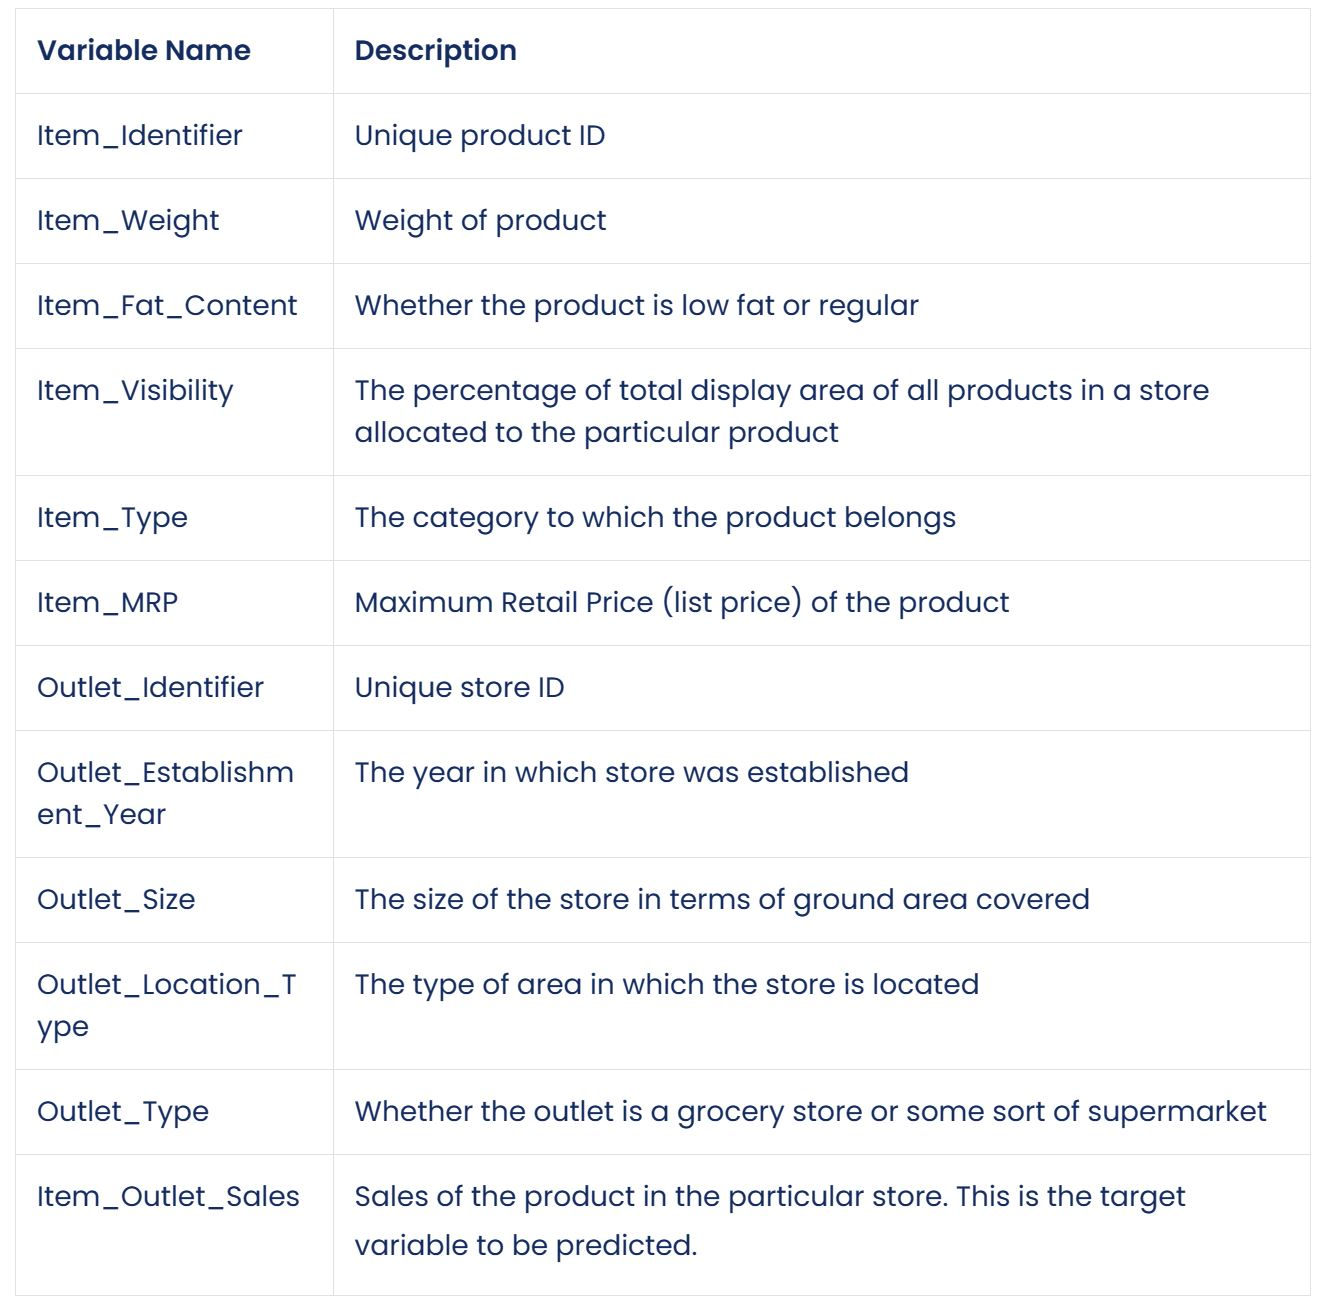

##Imports

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load and Inspect Data

In [2]:
#Loading dataset
df = pd.read_csv("/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv")
df.head(30)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [3]:
#Saving original dataset as 'df2'
df2 = df.copy()

In [4]:
#Viewing info on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
#View descriptive statistics for numerical colums
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


##Clean Data

In [6]:
#Viewing quantity of rows and columns within dataframe
df.shape

(8523, 12)

- There are 8523 rows and 12 columns.

Checking the data types:

In [7]:
#Viewing data types within dataframe
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

- Outlet_Identifier can be modified to a numerical column.

###Duplicated Data

Checking for duplicated data:

In [8]:
#Checking for duplicate rows within dataset
df.duplicated().sum()

0

- There are no duplicated rows in this dataset

###Missing Values

Checking for missing data:

In [9]:
#Viewing null values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Identifying % of missing data:

In [10]:
#Viewing null values as a percentage of total column values
df.isna().sum() / len(df) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

- Missing Values:
  - There are 1,463 missing values in the Item_Weight column. (17.17%)
  - There are 2,410 missing values in the Outlet_Size column. (28.28%)

Inspecting Item_Weight:
  - Here we are setting the style to use for seaborn so all the visuals have the same format.

In [11]:
#Viewing value counts for "Item_Weight"
df["Item_Weight"].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [12]:
#Viewing distribution of "Item_Weight" Data
df["Item_Weight"].describe()


count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

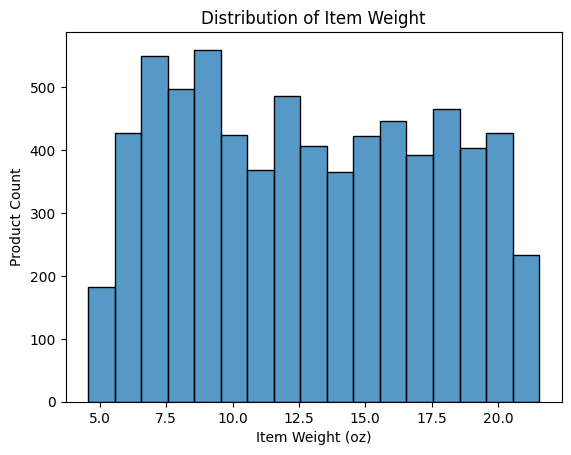

In [13]:
#Creating histogram to display the distibution of item weights
ax = sns.histplot(data = df, x = 'Item_Weight', binwidth=1);
ax.set_title("Distribution of Item Weight")
ax.set_xlabel("Item Weight (oz)")
ax.set_ylabel("Product Count");

Of the 7,060 items, the average weight of an individual product in the dataset is 12.86 with a standard deviation of 4.64.


We will fill in the missing values with "-1".

In [14]:
'''#Calculating the mean value for item weight
mean_value = df["Item_Weight"].mean()
df["Item_Weight"] = df["Item_Weight"].fillna(mean_value)'''

'#Calculating the mean value for item weight\nmean_value = df["Item_Weight"].mean()\ndf["Item_Weight"] = df["Item_Weight"].fillna(mean_value)'

In [15]:
'''#Calculating the mean value for item weight
df["Item_Weight"] = df["Item_Weight"].fillna(-1)'''

'#Calculating the mean value for item weight\ndf["Item_Weight"] = df["Item_Weight"].fillna(-1)'

- Checking to make sure the null values for Item_Weight were filled in.

In [16]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Inspecting Outlet_Size:

In [17]:
#Viewing value counts for Outlet_Size
df["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

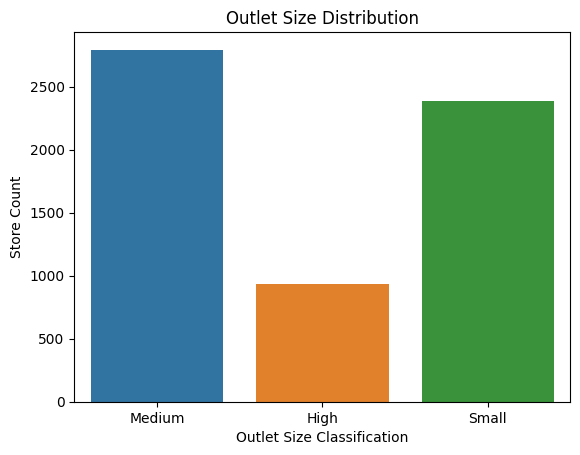

In [18]:
#Viewing the countplot for Outlet_Size
ax = sns.countplot(data = df, x = 'Outlet_Size');
ax.set_title("Outlet Size Distribution")
ax.set_ylabel("Store Count")
ax.set_xlabel("Outlet Size Classification");

- This graph shows that the most frequent outlet size is "Medium", followed closely by "Small" and the least frequent outlet size is "High".  To fill in the null column values there are a few approaches we could take:
  - We could drop the missing values.
  - Choose to fill in the missing column values with the most frequent for this feature.
  - Fill the values with "Unknown".

- We will choose the last option and fill these values with "Unknown"

In [19]:
'''#Replce null values in "Outlet_Size" with "Unknown"
df['Outlet_Size'] = df['Outlet_Size'].fillna(value = 'Unknown')'''

'#Replce null values in "Outlet_Size" with "Unknown"\ndf[\'Outlet_Size\'] = df[\'Outlet_Size\'].fillna(value = \'Unknown\')'

In [20]:
#Checking to see that values were replaced
df["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

- Checking to see that missing values for the Outlet_Size column were filled in.

In [21]:
#Checking sum of all null values within dataset
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Inspecting values for "Item_Fat_Content"

In [22]:
#Viewing value counts for Item_Fat_Content column
df["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

- The values should be standardized to "Low Fat" and "Regular"

In [23]:
#Standardizing variations of "Low Fat" and "Regular"
df["Item_Fat_Content"] = df["Item_Fat_Content"].str.replace("LF", "Low Fat")
df["Item_Fat_Content"] = df["Item_Fat_Content"].str.replace("low fat", "Low Fat")
df["Item_Fat_Content"] = df["Item_Fat_Content"].str.replace("reg", "Regular")

#Verifying that replacements were made
df["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

##Exploratory Data Analysis

###Statistical distribution of numerical columns

In [24]:
# Using select dtypes to get names of numerical columns
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

####Statistical Distribution: Item_Weight



In [25]:
#Descriptive statistics for Item Weight
df["Item_Weight"].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

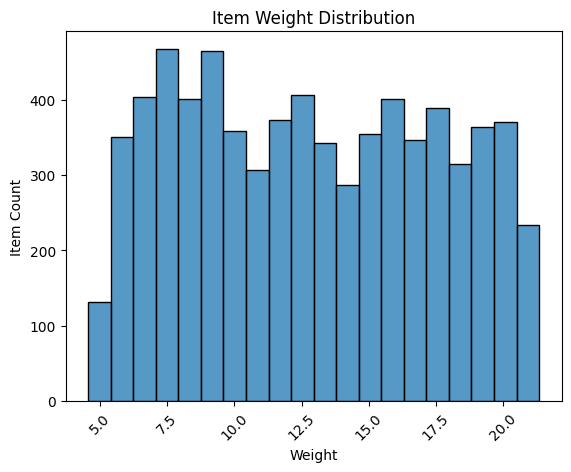

In [26]:
#Histogram for Item_Weight
ax = sns.histplot(data=df, x="Item_Weight")
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);
ax.set(title= "Item Weight Distribution", xlabel="Weight", ylabel="Item Count");

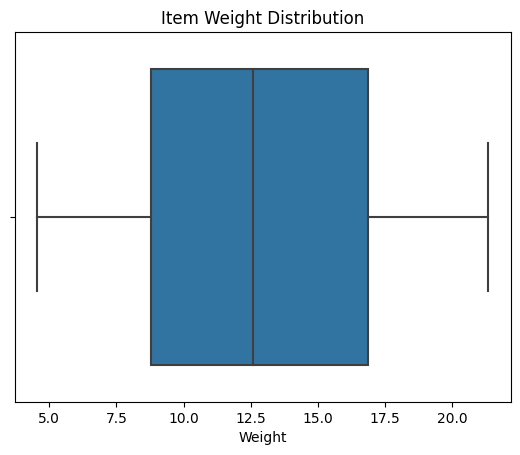

In [27]:
#Horizontal boxplot for Item_Weight
ax = sns.boxplot(data=df, x="Item_Weight")
ax.set(title= "Item Weight Distribution", xlabel="Weight");

####Statistical Distribution: Item_Visibility


In [28]:
#Descriptive statistics for Item Visibility
df["Item_Visibility"].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

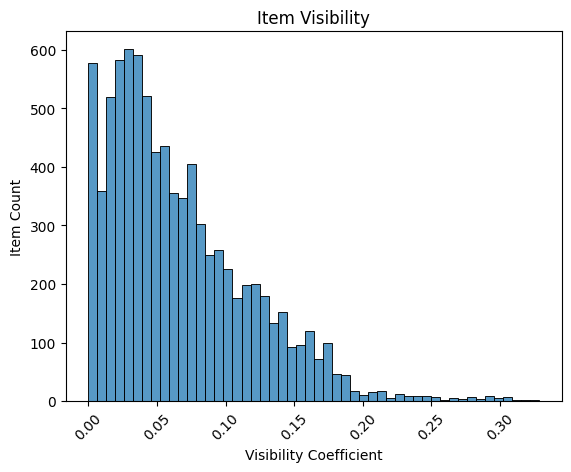

In [29]:
#Histogram for Item_Visibility
ax = sns.histplot(data=df, x="Item_Visibility")
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);
ax.set(title= "Item Visibility", xlabel="Visibility Coefficient", ylabel="Item Count");

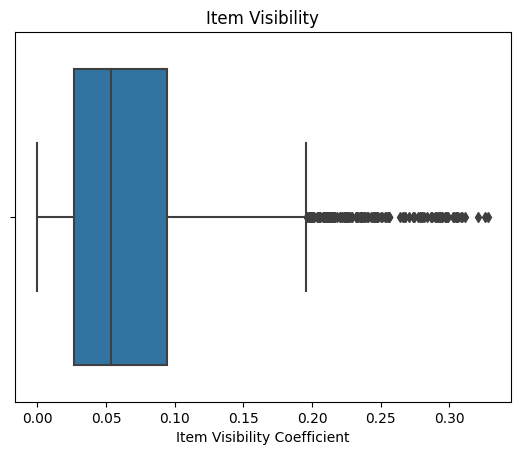

In [30]:
#Horizontal boxplot for Item_Visibility
ax = sns.boxplot(data=df, x="Item_Visibility")
ax.set(title= "Item Visibility", xlabel="Item Visibility Coefficient");

####Statistical Distribution: Item_MRP

In [31]:
#Descriptive statistics for Item MRP
df["Item_MRP"].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

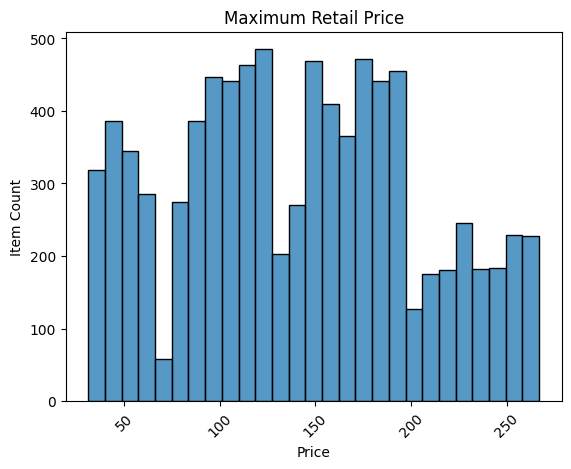

In [32]:
#Histogram for Item_MRP
ax = sns.histplot(data=df, x="Item_MRP")
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);
ax.set(title= "Maximum Retail Price", xlabel="Price", ylabel="Item Count");

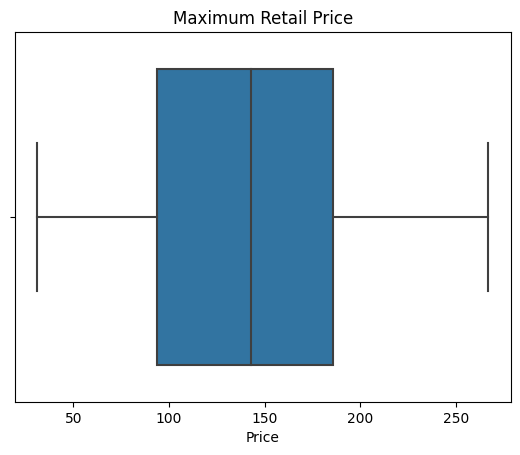

In [33]:
#Horizontal boxplot for Item_MRP
ax = sns.boxplot(data=df, x="Item_MRP")
ax.set(title= "Maximum Retail Price", xlabel="Price");

####Statistical Distribution: Item_Outlet_Sales

In [34]:
#Descriptive statistics for Item Outlet Sales
df["Item_Outlet_Sales"].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

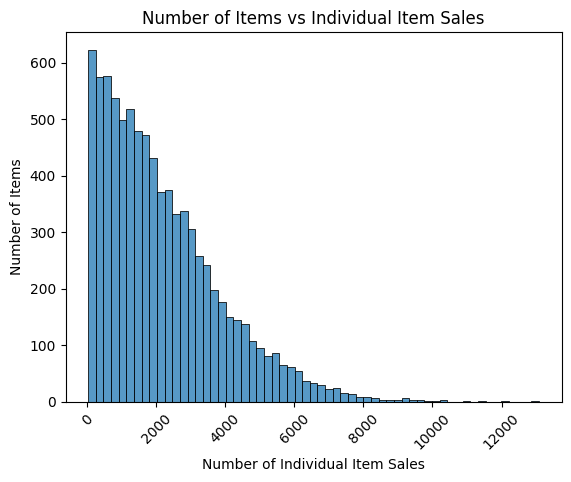

In [35]:
#Histogram for Item_Outlet_Sales
ax = sns.histplot(data=df, x="Item_Outlet_Sales")
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);
ax.set(title= "Number of Items vs Individual Item Sales", xlabel="Number of Individual Item Sales", ylabel="Number of Items");

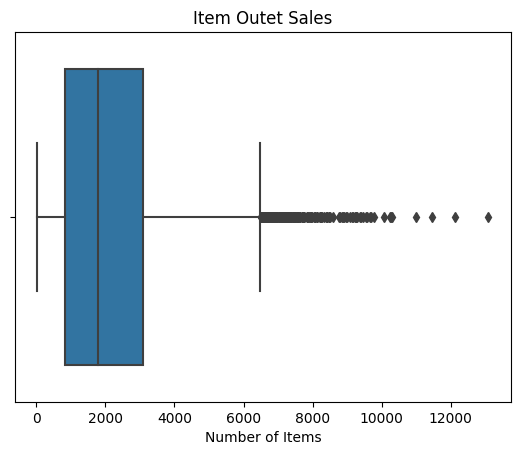

In [36]:
# Horizontal boxplot for Item_Outlet_Sales
ax = sns.boxplot(data=df, x="Item_Outlet_Sales")
ax.set(title= "Item Outet Sales", xlabel="Number of Items");

###Categorical Value Distribution


In [37]:
# Using select dtypes to get names of categorical columns
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [38]:
#Viewing quantity of unique values in each object category
df[cat_cols].nunique()

Item_Identifier         1559
Item_Fat_Content           2
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

####Categorical Value Distribution: Item_Fat_Content

In [39]:
#Viewing values for category
df['Item_Fat_Content'].describe()

count        8523
unique          2
top       Low Fat
freq         5517
Name: Item_Fat_Content, dtype: object

In [40]:
#Item fat content as percentage of items
item_Fat_Content_counts = df['Item_Fat_Content'].value_counts()
item_Fat_Content_percentages = item_Fat_Content_counts / len(df) * 100

item_Fat_Content_percentages

Low Fat    64.730729
Regular    35.269271
Name: Item_Fat_Content, dtype: float64

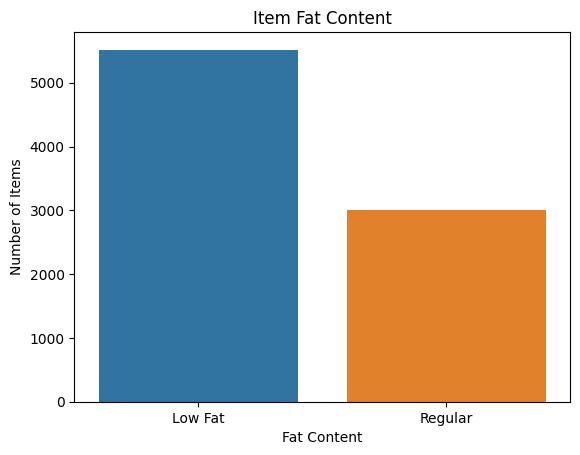

In [41]:
# Seaborn countplot for values in Item_Fat_Content
ax = sns.countplot(data=df, x="Item_Fat_Content")
ax.set(title= "Item Fat Content", xlabel="Fat Content", ylabel= "Number of Items");

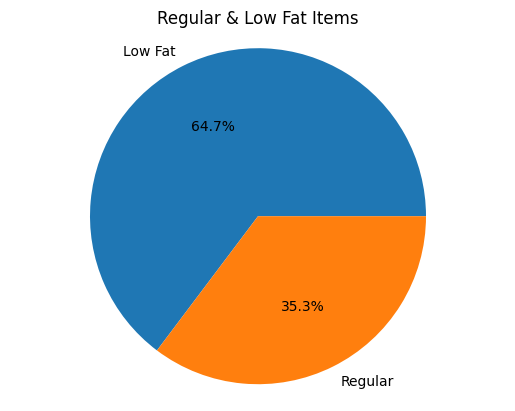

In [42]:
#Displaying Percentages as a pie chart
plt.pie(item_Fat_Content_percentages, labels=item_Fat_Content_percentages.index, autopct='%1.1f%%')
plt.title('Regular & Low Fat Items')
plt.axis('equal');

####Categorical Value Distribution: Item_Type

In [43]:
#Viewing value counts for category
df["Item_Type"].describe()

count                      8523
unique                       16
top       Fruits and Vegetables
freq                       1232
Name: Item_Type, dtype: object

In [44]:
#Item_Types as percentage of items
item_type_counts = df['Item_Type'].value_counts()
item_type_percentages = item_type_counts / len(df) * 100

item_type_percentages

Fruits and Vegetables    14.455004
Snack Foods              14.079549
Household                10.676992
Frozen Foods             10.043412
Dairy                     8.001877
Canned                    7.614690
Baking Goods              7.602957
Health and Hygiene        6.101138
Soft Drinks               5.221166
Meat                      4.986507
Breads                    2.944972
Hard Drinks               2.510853
Others                    1.982870
Starchy Foods             1.736478
Breakfast                 1.290625
Seafood                   0.750909
Name: Item_Type, dtype: float64

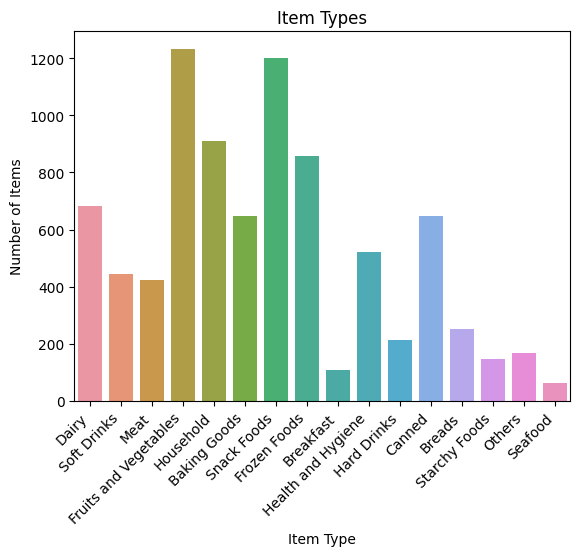

In [45]:
# Seaborn countplot for values in Item_Type
ax = sns.countplot(data=df, x="Item_Type")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', );
ax.set(title= "Item Types", xlabel="Item Type", ylabel= "Number of Items");

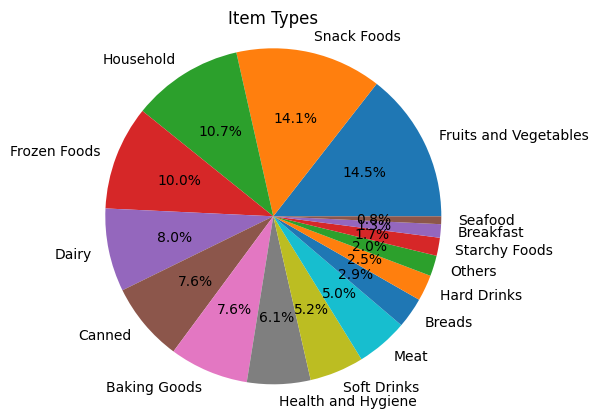

In [46]:
#Displaying percentages in pie chart
plt.pie(item_type_percentages, labels=item_type_percentages.index, autopct='%1.1f%%')
plt.title('Item Types')
plt.axis('equal');

####Categorical Value Distribution: Outlet_Identifier

In [47]:
# Seaborn countplot for values in Outlet_Identifier
df["Outlet_Identifier"].describe()


count       8523
unique        10
top       OUT027
freq         935
Name: Outlet_Identifier, dtype: object

####Categorical Value Distribution: Outlet_Size

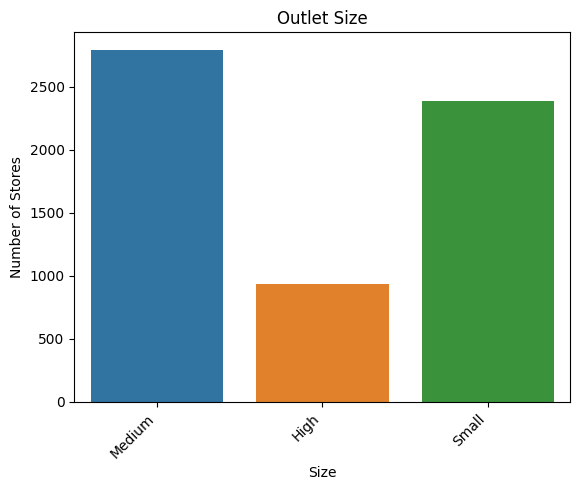

In [48]:
# Seaborn countplot for values in Outlet_Sales
ax = sns.countplot(data=df, x="Outlet_Size")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.set(title= "Outlet Size", xlabel="Size", ylabel= "Number of Stores");

In [49]:
#Outlet_Size as percentage of Items
Outlet_Size_counts = df['Outlet_Size'].value_counts()
Outlet_Size_percentages = Outlet_Size_counts / len(df) * 100

Outlet_Size_percentages

Medium    32.770151
Small     28.018303
High      10.935117
Name: Outlet_Size, dtype: float64

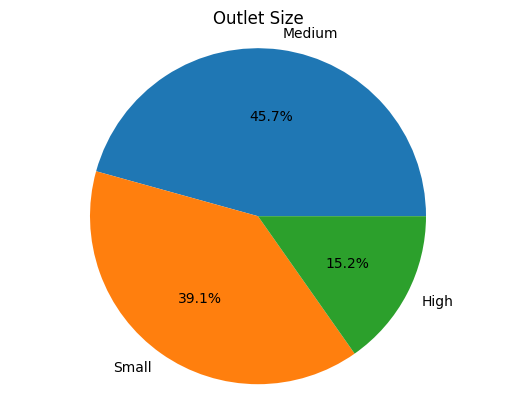

In [50]:
#Displaying Percentages as a pie chart
plt.pie(Outlet_Size_percentages, labels=Outlet_Size_percentages.index, autopct='%1.1f%%')
plt.title('Outlet Size')
plt.axis('equal');

percentages of each

####Categorical Value Distribution: Outlet_Location_Type

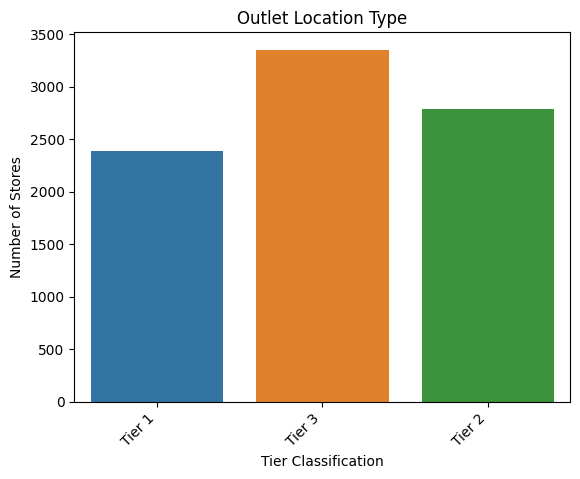

In [51]:
# Seaborn countplot for values in Outlet_Location_Type
ax = sns.countplot(data=df, x="Outlet_Location_Type")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.set(title= "Outlet Location Type", xlabel="Tier Classification", ylabel= "Number of Stores");

In [52]:
#Outlet_Location_Type as percentage of Items
Outlet_Location_Type_counts = df['Outlet_Location_Type'].value_counts()
Outlet_Location_Type_percentages = Outlet_Location_Type_counts / len(df) * 100

Outlet_Location_Type_percentages

Tier 3    39.305409
Tier 2    32.676288
Tier 1    28.018303
Name: Outlet_Location_Type, dtype: float64

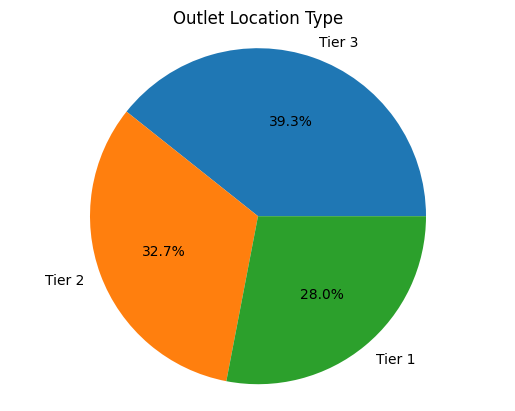

In [53]:
#Displaying Percentages as a pie chart
plt.pie(Outlet_Location_Type_percentages, labels=Outlet_Location_Type_percentages.index, autopct='%1.1f%%')
plt.title('Outlet Location Type')
plt.axis('equal');

####Categorical Value Distribution: Outlet_Type

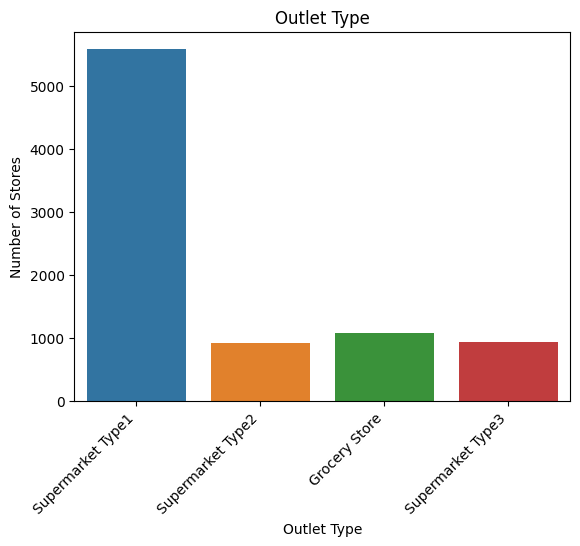

In [54]:
# Seaborn countplot for values in Outlet_Type
ax = sns.countplot(data=df, x="Outlet_Type")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.set(title= "Outlet Type", xlabel="Outlet Type", ylabel= "Number of Stores");

In [55]:
#Outlet_Type as percentage of Items
Outlet_Type_counts = df['Outlet_Type'].value_counts()
Outlet_Type_percentages = Outlet_Type_counts / len(df) * 100

Outlet_Type_percentages

Supermarket Type1    65.434706
Grocery Store        12.706793
Supermarket Type3    10.970316
Supermarket Type2    10.888185
Name: Outlet_Type, dtype: float64

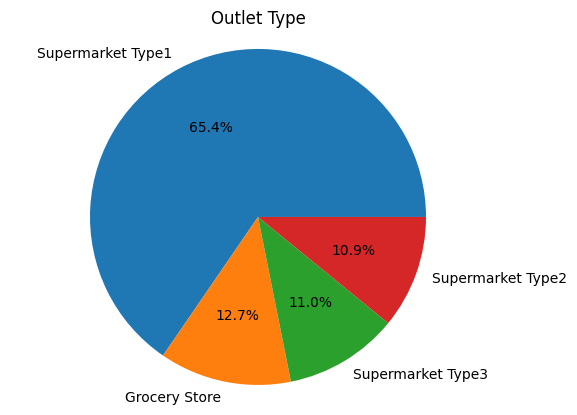

In [56]:
#Displaying Percentages as a pie chart
plt.pie(Outlet_Type_percentages, labels=Outlet_Type_percentages.index, autopct='%1.1f%%')
plt.title('Outlet Type')
plt.axis('equal');

###Correlation Map Exploration

<ipython-input-57-16ccbbfc6491>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(),annot=True,cmap='coolwarm');


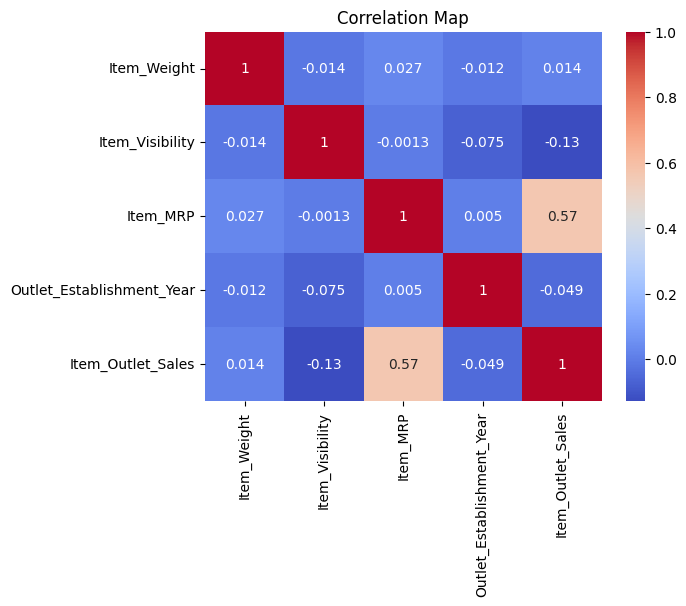

In [57]:
#Viewing heatmap to explore possible correlations
ax = sns.heatmap(df.corr(),annot=True,cmap='coolwarm');
ax.set_title("Correlation Map");

##**EDA Functions**


For Part 4, your task is to inspect the features:  For feature inspection, we want to be fully aware of any null values present so that we can make informed choices about data preparation for machine learning in the next course. Therefore, before you proceed,  


Remove the placeholders you added in week 2 and replace them with null values.
This will allow our functions to report the presence and frequency of null values as part of our EDA.​


For each feature:


Add a new markdown header.
Paste the feature's definition from the data dictionary into a markdown cell.
Create a univariate visualization showing the distribution of values/categories.
You may use the EDA functions from the previous lessons or create your own visualizations.


- Answer the following questions from the Feature Inspection lesson in a markdown cell:


  - What type of feature is it? (Categorical (nominal), ordinal, numeric)


  -How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)


  - Is the feature constant or quasi-constant?


  - What is the cardinality? Is it high (>10)?


  - Would we know this feature before the target is determined?


  - Is there a business case/understanding reason to exclude based on our business case?


-Create a multivariate visualization plotting each feature vs. the target.
You may use the EDA functions from the previous lessons or create your own visualizations.​



  - Answer the following questions from the Feature Inspection lesson in a Markdown cell:


  - Based on your business understanding, would you expect this feature to be a predictor of the target?


Does this feature appear to be a predictor of the target?

###**Function Definition**

In [58]:
# Replacing -1 values in Item_Weight with "NaN"
df["Item_Weight"] = df["Item_Weight"].replace(-1, "")

In [59]:
#Replce "Unknown" values in Outlet_Size with "NaN"
df['Outlet_Size'] = df['Outlet_Size'].replace('Unknown', "")


In [60]:
'''Univariate Plotting functions for EDA'''

from matplotlib import gridspec
# Define function to add to print statements
def explore_categorical(df, x, fillna=True, placeholder = "Missing",
                        figsize = (6, 4), order = None):
  #create a temporary dataframe from original data set
  temp_df = df.copy()
  # Calculate percent of null values for printing
  null_count = temp_df[x].isna().sum()
  null_percent = null_count/len(temp_df)*100
  # fill na with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Adjust tick label orientation
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
  # Add title
  ax.set_title(f"Column: {x}", fontweight="bold")

  # Fix layout and show plot before print statements
  fig.tight_layout()
  plt.show()

  # Print null value information
  print(f"- NaN's Found: {null_count} ({round(null_percent, 2)}%)")
  # Print cardinality information
  nunique = temp_df[x].unique()
  print(f" - Unique Values: {nunique}")
  # Showing value counts of features
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_value = val_counts.index[0]
  # Frequency of most common value
  freq = val_counts.values[0]
  #Calculate percentage of most common value
  perc_most_common = freq / len(temp_df)*100
  # Print results
  print(f"- Most common values: '{most_common_value}' occurs {freq} times ({round(perc_most_common, 2)}%)")
  # Print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n-[!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print(f"- Not constant or quasi-constant.")
  return fig, ax


#add the new print statements from explore_categorical
def explore_numeric(df, x, figsize=(6,5) ):
  #make a copy of df
  temp_df = df.copy()
  # Calculate percent of null values for printing
  null_count = temp_df[x].isna().sum()
  null_percent = null_count/len(temp_df)*100

  # Make figure with gridspec for subplots
  gridspec = {"height_ratios":[0.7, 0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                          sharex= True, gridspec_kw = gridspec)
  # Histogram on top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  # Adding title
  axes[0].set_title(f"Column: {x}", fontweight="bold")

  # Adjusting subplots
  fig.tight_layout()

  # Display plot before message
  plt.show()

  # Print null value info
  print(f" - NaN's Found: {null_count} ({round(null_percent, 2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # Get the most common values as number and percent
  most_common_value_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_value_count.index[0]
  freq = most_common_value_count.values[0]
  perc_most_common = freq / len(df) *100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common, 2)}%)")

 # Print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n-[!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print(f"- Not constant or quasi-constant.")
  return fig, ax


In [61]:
'''Multivariate Plotting functions vs Numeric Target'''

def plot_categorical_vs_target(df, x, y="Item_Outlet_Sales", figsize=(6,4),
                               fillna=True, placeholder= "Missing",
                               order = None):
  # Make a copy of df
  temp_df = df.copy()

  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls
  else:
    temp_df = temp_df.dropna(subset=[x])

  # Create figures
  fig, ax = plt.subplots(figsize=figsize)

  # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order= order, alpha=0.6,
              linewidth= 1, edgecolor="black", errorbar = None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax, order= order,
                hue_order= order, legend=False,
                size=3, zorder=0)
  # Rotate x labels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

  # Add title
  ax.set_title(f"{x} vs. {y}", fontweight="bold")
  fig.tight_layout()
  return fig, ax

def plot_numeric_vs_target(df, x, y="Item_Outlet_Sales",
                           figsize=(6,4),
                           ):
  # Calculate correlation
  corr= df[[x,y]].corr().round(2)
  r= corr.loc[x,y]

  # Plot data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws = {"ec":"white", "lw": 1, "alpha":0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws = scatter_kws)

  #Add title with correlation
  ax.set_title(f"{x} vs. {y} (r= {r})", fontweight = "bold")

  # Show plot before print statement
  plt.show()

  return fig, ax


###**Inspecting Categorical Features**

In [62]:
# Display categorical columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

####**Item_Identifier**


Product ID

In [63]:
# Define Feature
feature = "Item_Identifier"
df[feature].dtype

dtype('O')

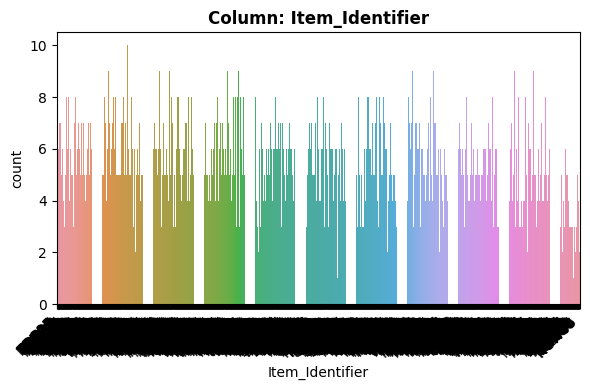

- NaN's Found: 0 (0.0%)
 - Unique Values: ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
- Most common values: 'FDW13' occurs 10 times (0.12%)
- Not constant or quasi-constant.


In [64]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0%)

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Many unique categories.
  - Very High Cardinality (>10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - Before we can use this data, we will have to filter by Item_Identifier and compare the sales for like items across different stores.


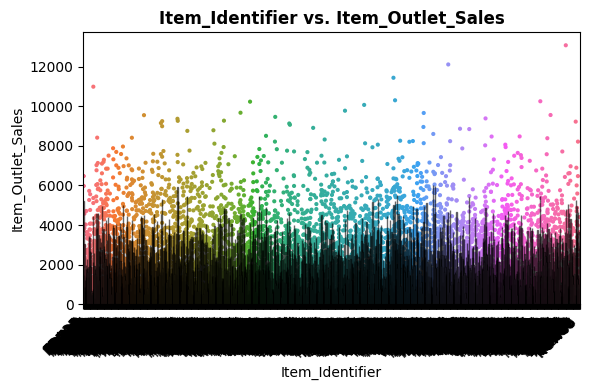

In [65]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature,'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Yes, This is the item that the target will be analyzing.


####**Item_Fat_Content**


Whether the product is low-fat or regular

In [66]:
# Define Feature
feature = "Item_Fat_Content"
df[feature].dtype

dtype('O')

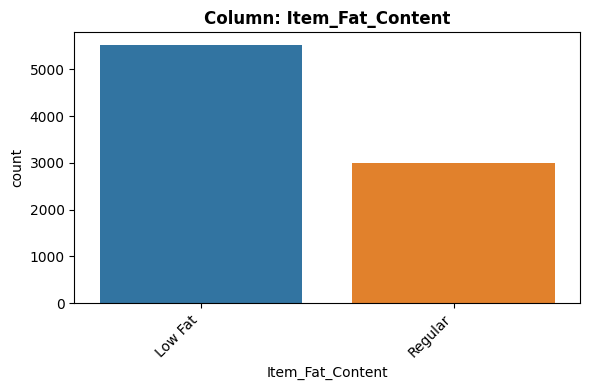

- NaN's Found: 0 (0.0%)
 - Unique Values: ['Low Fat' 'Regular']
- Most common values: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [67]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Ordinal

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0%)

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 2 unique categories.
  - Not high cardinality (not >10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.


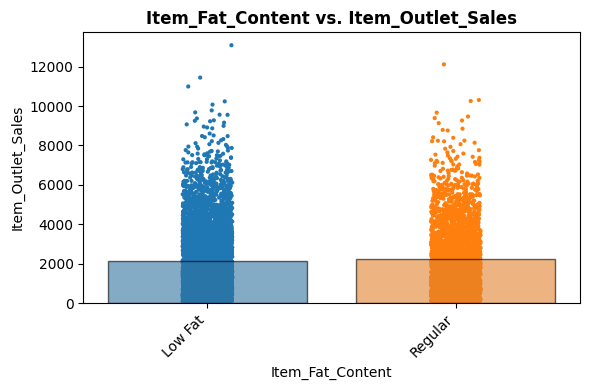

In [68]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature,'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Yes.

####**Item_Type**


The category to which the product belongs

In [69]:
# Define Feature
feature = "Item_Type"
df[feature].dtype

dtype('O')

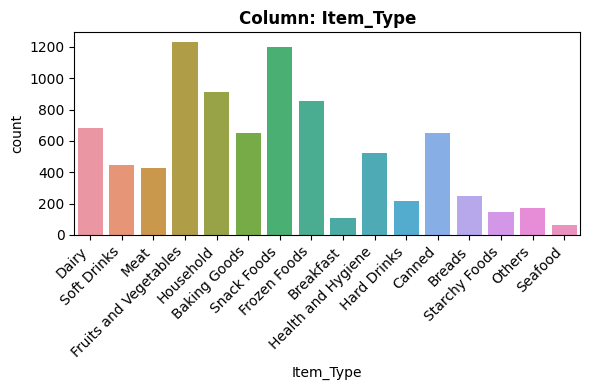

- NaN's Found: 0 (0.0%)
 - Unique Values: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
- Most common values: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [70]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0%)

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 16 unique categories.
  - High cardinality (>10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.


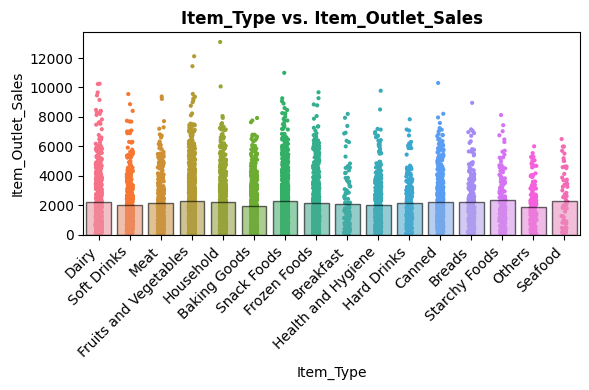

In [71]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature,'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Yes.

####**Outlet_Identifier**


Store ID

In [72]:
# Define Feature
feature = "Outlet_Identifier"
df[feature].dtype

dtype('O')

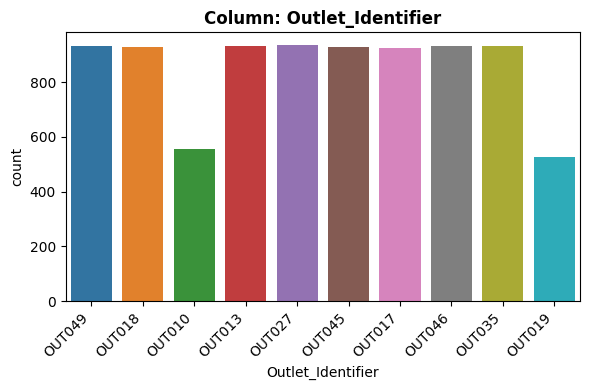

- NaN's Found: 0 (0.0%)
 - Unique Values: ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
- Most common values: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


In [73]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0%)

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 10 unique categories.
  - High cardinality (>10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.


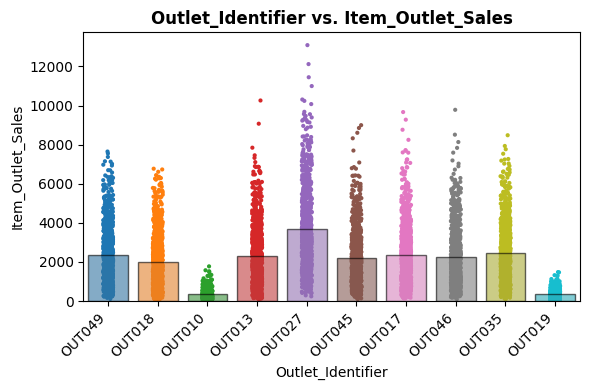

In [74]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature,'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Yes.

####**Outlet_Size**


The size of the store in terms of ground area covered

In [75]:
# Define Feature
feature = "Outlet_Size"
df[feature].dtype

dtype('O')

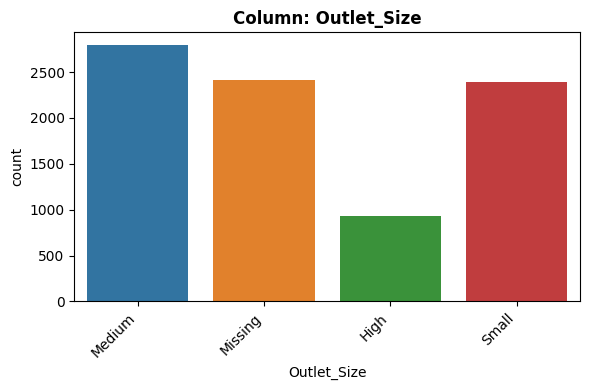

- NaN's Found: 2410 (28.28%)
 - Unique Values: ['Medium' 'Missing' 'High' 'Small']
- Most common values: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [76]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Ordinal

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 2410 null values (28.28%)
  - Impute with "MISSING" placeholder.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 3 unique categories.
  - Not high cardinality (not >10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.


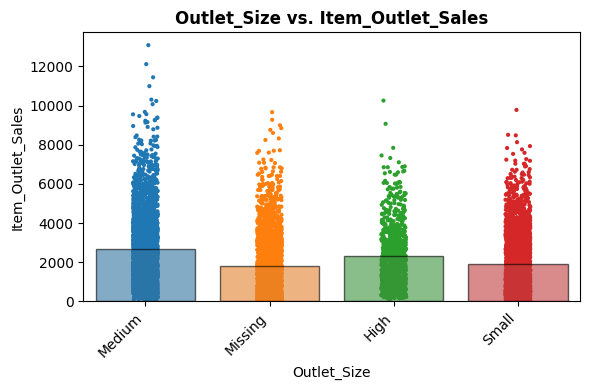

In [77]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature,'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Yes.

####**Outlet_Location_Type**


The type of area in which the store is located

In [78]:
# Define Feature
feature = "Outlet_Location_Type"
df[feature].dtype

dtype('O')

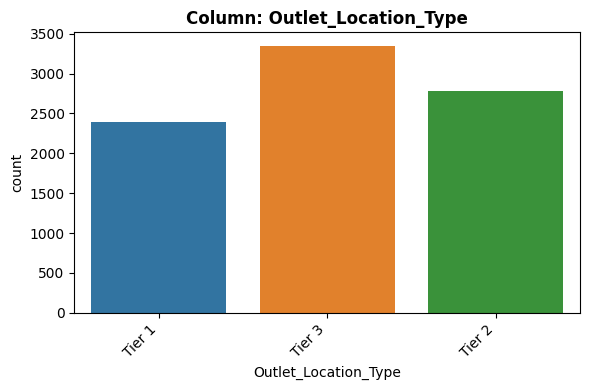

- NaN's Found: 0 (0.0%)
 - Unique Values: ['Tier 1' 'Tier 3' 'Tier 2']
- Most common values: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [79]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Ordinal

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0%)

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 3 unique categories.
  - Not high cardinality (not >10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.


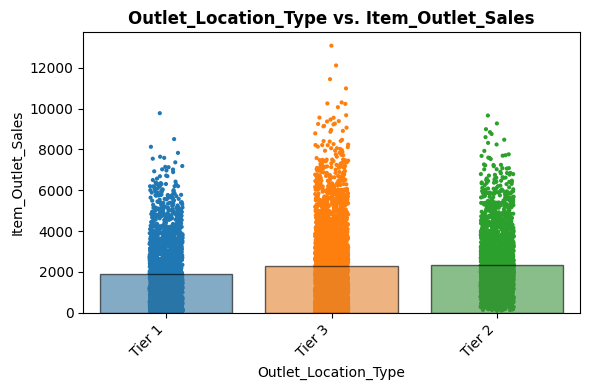

In [80]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature,'Item_Outlet_Sales');

####**Outlet_Type**


Whether the outlet is a grocery store or some sort of supermarket

In [81]:
# Define Feature
feature = "Outlet_Type"
df[feature].dtype

dtype('O')

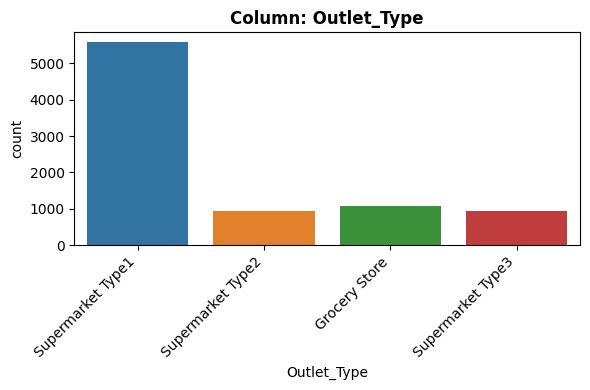

- NaN's Found: 0 (0.0%)
 - Unique Values: ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
- Most common values: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [82]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0%)

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 4 unique categories.
  - Not high cardinality (not >10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.


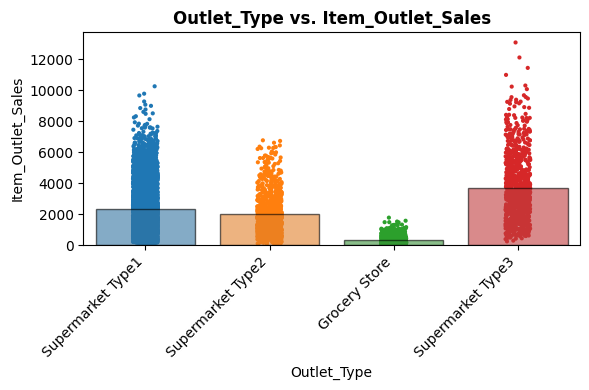

In [83]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature,'Item_Outlet_Sales');

###**Inspecting Numerical Features**

In [84]:
# Display numerical columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

####**Item_Weight**


Weight of product

In [85]:
# Confirming the dtype to select correct EDA function
feature = "Item_Weight"
df[feature].dtype

dtype('float64')

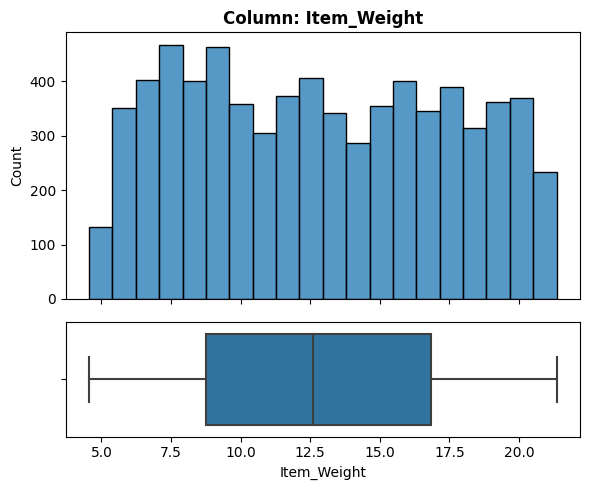

 - NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [86]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 1463 (17.17%)
  - impute with median.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.


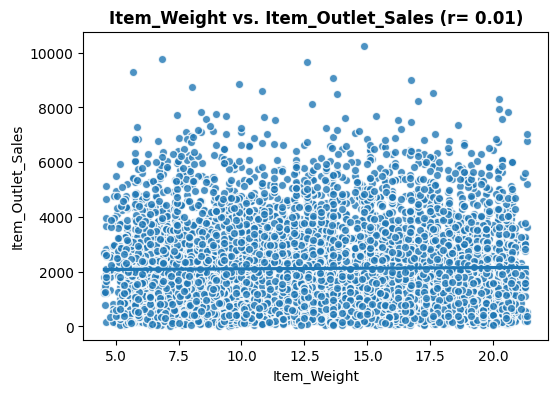

In [87]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df,feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    -  
  - Does this feature appear to be a predictor of the target?
    -  

___

####**Item_Visibility**


The percentage of total display area of all products in a store allocated to the particular product

In [88]:
# Confirming the dtype to select correct EDA function
feature = "Item_Visibility"
df[feature].dtype

dtype('float64')

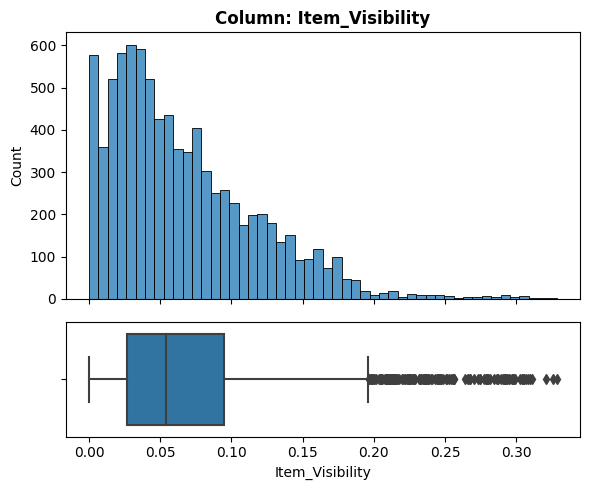

 - NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


In [89]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 (0%)

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.


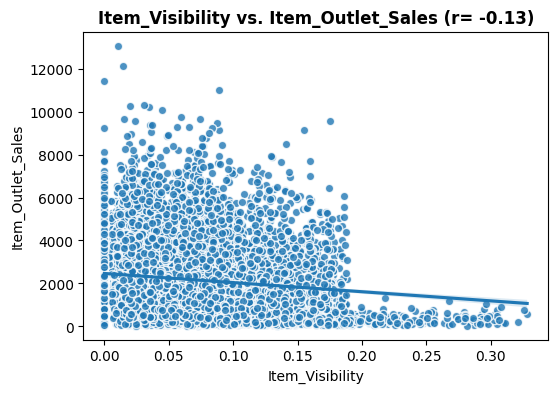

In [90]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df,feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Yes, but opposite direction than I expected!

___

####**Item_MRP**


Maximum Retail Price (list price) of the product

In [91]:
# Confirming the dtype to select correct EDA function
feature = "Item_MRP"
df[feature].dtype

dtype('float64')

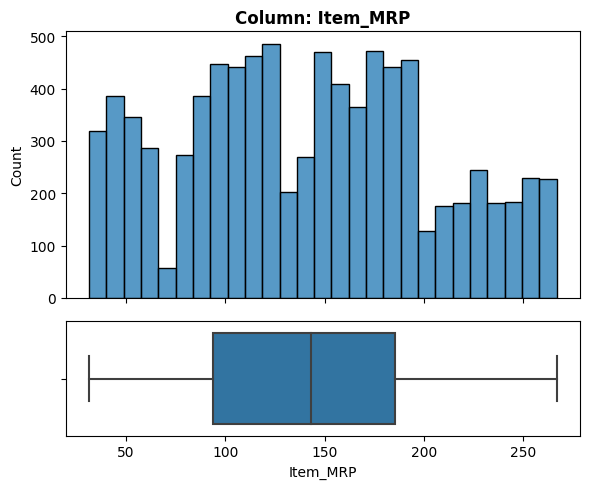

 - NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [92]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 (0%)

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.


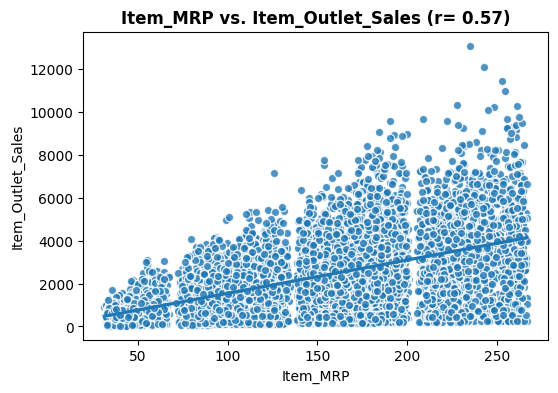

In [93]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df,feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Yes.

___

####**Outlet_Establishment_Year**


The year in which store was established

In [94]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Establishment_Year"
df[feature].dtype

dtype('int64')

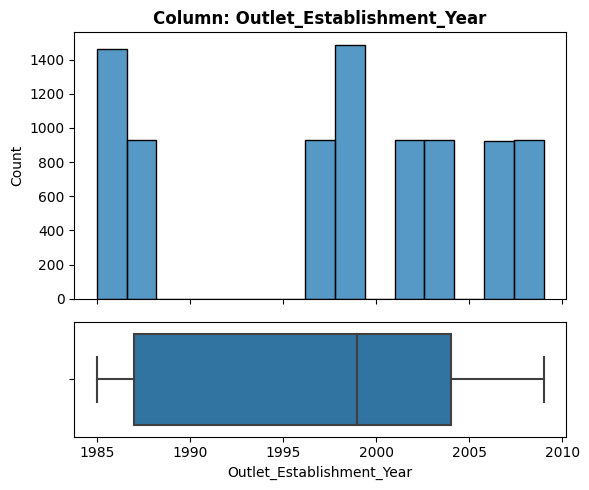

 - NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [95]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 (0%)

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.


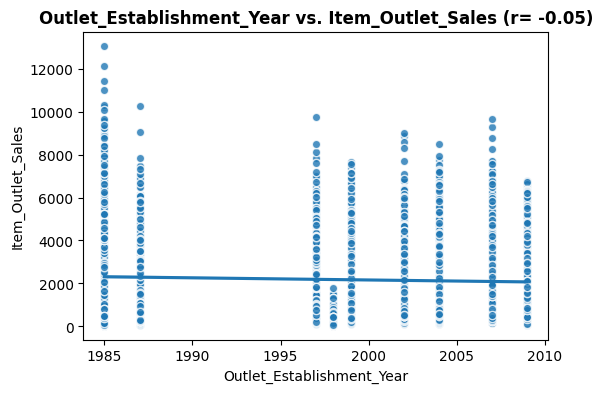

In [96]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df,feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Maybe.
  - Does this feature appear to be a predictor of the target?
    - No correlation displayed here.

___

####**Item_Outlet_Sales**


Sales of the product in the particular store. This is the target variable to be predicted.

In [97]:
# Confirming the dtype to select correct EDA function
feature = "Item_Outlet_Sales"
df[feature].dtype

dtype('float64')

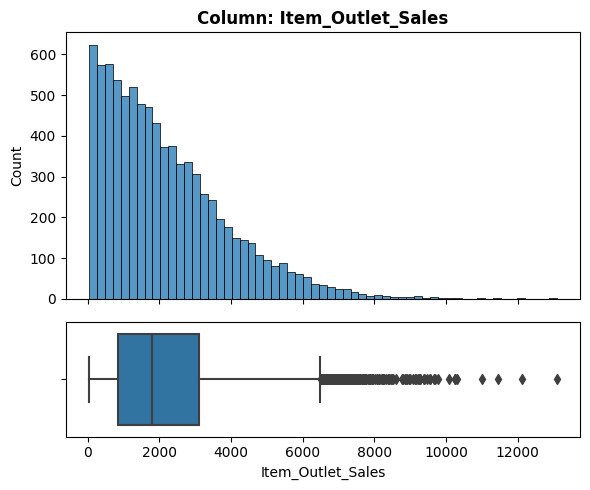

 - NaN's Found: 0 (0.0%)
- Unique Values: 3493
- Most common value: '958.752' occurs 17 times (0.2%)
- Not constant or quasi-constant.


In [98]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 (0%)

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.


# Project 1 - Part 5

## Preprocesing for Machine Learning

For Part 5, you will go back to your original dataset with the goal of preventing data leakage.

>Please note: If you imputed missing values based on a calculation on the entire dataset (such as mean), you should now perform that step after the train test split using SimpleImputer.

*   Identify the target (X) and features (y): We will assign the 'salary_in_usd' as the target and the rest of the relevant variables as the features matrix.
*   Perform a train test split
*   Create a pre processing pipeline to prepare the dataset for Machine Learning

In [99]:
## Typical Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Modeling & preprocessing import
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer

###Reloading the Data

In [100]:
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [102]:
# Checking for Duplicates
df2.duplicated().sum()

0

In [104]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [103]:
#Standardizing variations of "Low Fat" and "Regular"
df2["Item_Fat_Content"] = df2["Item_Fat_Content"].str.replace("LF", "Low Fat")
df2["Item_Fat_Content"] = df2["Item_Fat_Content"].str.replace("low fat", "Low Fat")
df2["Item_Fat_Content"] = df2["Item_Fat_Content"].str.replace("reg", "Regular")

#Verifying that replacements were made
df2["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

###Defining X and y

In [105]:
# Dropping missing values in Item_Outlet_Sales
# Must drop these values that are missing since this
# column is our target

df2 = df2.dropna(subset = ['Item_Outlet_Sales'], how = 'all')

In [106]:
## Define X and y
target = 'Item_Outlet_Sales'

X = df2.drop(columns=target).copy()
y = df2[target].copy()
X.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


### Train-Test-Split

In [108]:
# Perfoming a train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

### Making a Preprocessing Pipeline


In [109]:
# Creating a categorical data selector
cat_selector = make_column_selector(dtype_include = 'object')
cat_selector(X_train)

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [110]:
# Creating a pipline for handling categorical data

impute_cat = SimpleImputer(strategy='most_frequent')
encoder = OneHotEncoder(handle_unknown='ignore',sparse=False)

cat_pipe = make_pipeline(impute_cat,encoder)
cat_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [111]:
## test cat_pipe (optional)
cat_pipe.fit_transform(X_train[cat_selector(X_train)])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [112]:
# Creating a numeric data selector
num_selector = make_column_selector(dtype_include='number')
num_selector(X_train)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

In [113]:
# Creating scaler object to scale the data
scaler = StandardScaler()

In [114]:
## test num_pipe (optional)
scaler.fit_transform(X_train[num_selector(X_train)])

array([[ 0.74311896, -0.71277507,  1.82810922,  1.32784893],
       [ 0.50587592, -1.29105225,  0.60336888,  1.32784893],
       [-0.11958298,  1.81331864,  0.24454056,  0.13618724],
       ...,
       [ 1.01271331, -0.92052713,  1.52302674,  0.49368575],
       [ 1.60582089, -0.2277552 , -0.38377708,  1.0895166 ],
       [ 0.74311896, -0.95867683, -0.73836105, -0.10214509]])

In [115]:
## Combine into 1 column transformer
preprocessor = make_column_transformer((cat_pipe,cat_selector),
                                       (scaler,num_selector))
preprocessor

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False,
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe538c61d50>),
                                ('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe538c62800>)])

In [116]:
## Test Col Transformer (optional)
preprocessor.fit_transform(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[ 0.        ,  0.        ,  0.        , ..., -0.71277507,
         1.82810922,  1.32784893],
       [ 0.        ,  0.        ,  0.        , ..., -1.29105225,
         0.60336888,  1.32784893],
       [ 0.        ,  0.        ,  0.        , ...,  1.81331864,
         0.24454056,  0.13618724],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.92052713,
         1.52302674,  0.49368575],
       [ 0.        ,  0.        ,  0.        , ..., -0.2277552 ,
        -0.38377708,  1.0895166 ],
       [ 0.        ,  0.        ,  0.        , ..., -0.95867683,
        -0.73836105, -0.10214509]])

In [117]:
type(preprocessor)

sklearn.compose._column_transformer.ColumnTransformer

##Explanatory Data Analysis